In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [85]:
btc = pd.read_csv('C:/Users/alexs/jupyter/btc-eth-prices-outliers.csv', 
        index_col = 0,
        parse_dates=True)

In [86]:
btc.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

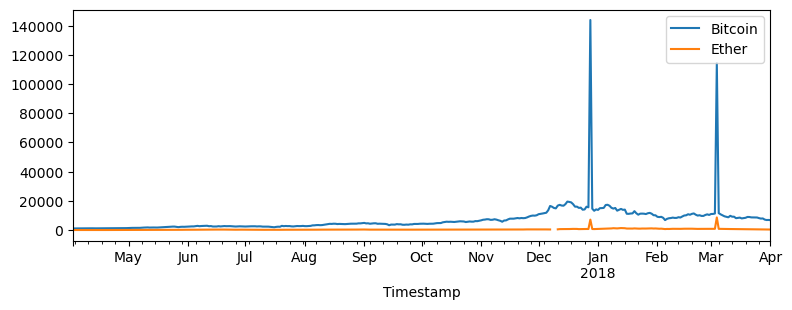

In [87]:
btc.plot(figsize=(9,3))

**Missing of ETH data at the end of 2017 in December**

<Axes: xlabel='Timestamp'>

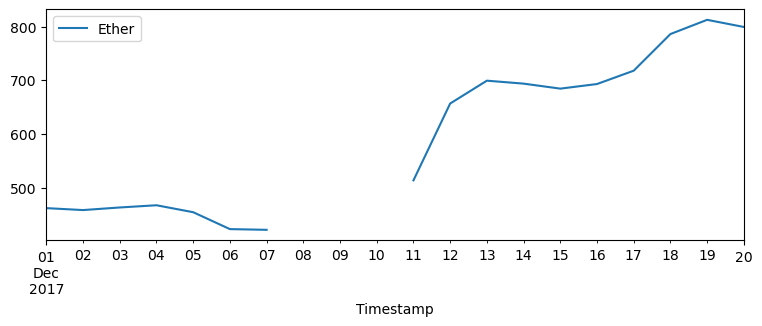

In [88]:
btc.loc['2017-12': '2017-12-20'].plot(y='Ether', figsize=(9,3))

In [89]:
btc_nan = btc.loc['2017-12': '2017-12-20']
btc_nan['Ether'].isna().values.any()
btc_nan.loc[btc_nan['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [90]:
# Filling the missing values 

btc.loc['2017-12-06': '2017-12-12']
btc.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


<Axes: xlabel='Timestamp'>

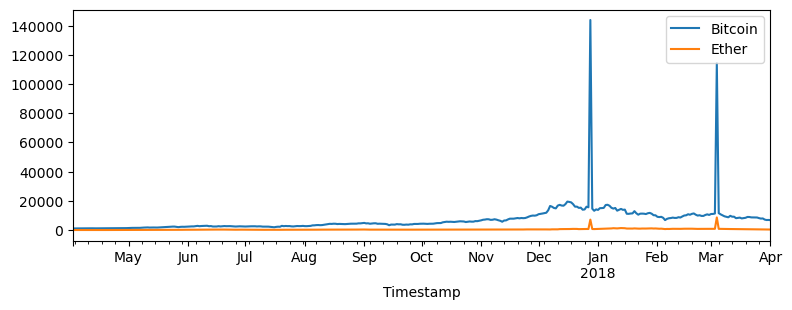

In [121]:
btc.fillna(method='bfill', inplace=True)
btc.plot(figsize=(9, 3))

<Axes: xlabel='Timestamp'>

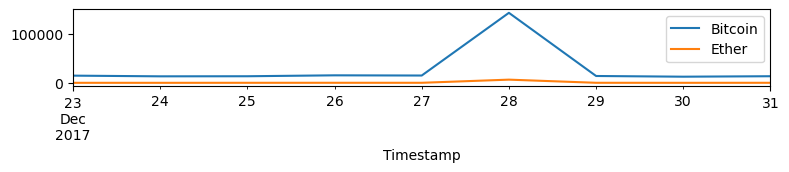

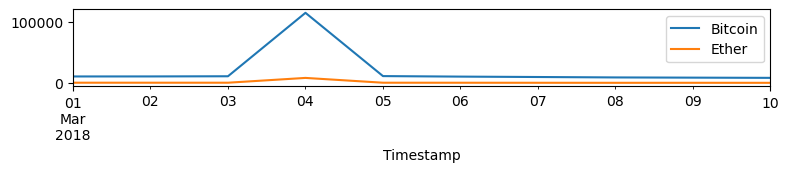

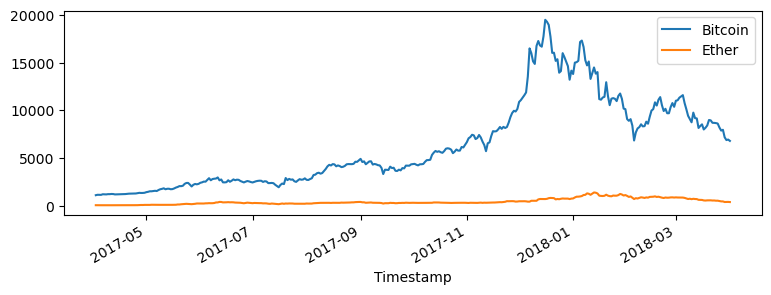

In [92]:
# Treatment of outliers 
btc['2017-12-23' : '2017-12-31'].plot(figsize=(9,1)) # 28/12/2017
btc['2018-03-01' : '2018-03-10'].plot(figsize=(9,1)) # 04/03/2018

btc_cleaned = btc.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
btc_cleaned.plot(figsize=(9,3))

In [104]:
btc.describe() # with outliers

,Bitcoin,Ether
count,365.000000,365.000000
mean,6996.004022,469.609068
std,10186.586168,634.202918
min,1099.169125,42.310000
25%,2585.349186,240.940000
50%,4594.987850,309.490000
75%,9182.843333,656.520000
max,143805.816667,8648.300000


In [105]:
btc_cleaned.describe()

,Bitcoin,Ether
count,363.000000,363.000000
mean,6323.509186,428.628402
std,4513.757663,306.699311
min,1099.169125,42.310000
25%,2573.739924,239.330000
50%,4580.387480,309.320000
75%,9121.989167,611.855000
max,19498.683333,1385.020000


<Axes: ylabel='Frequency'>

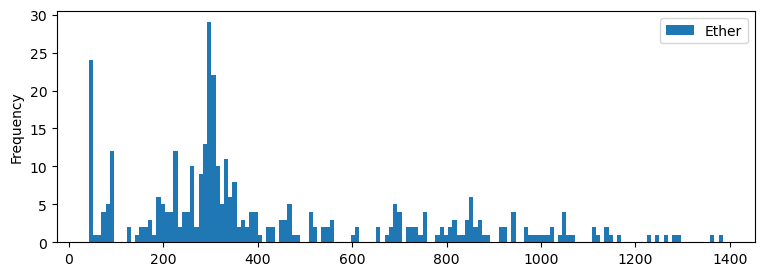

In [110]:
btc_cleaned.plot(kind='hist', y='Ether', bins=150, figsize=(9,3))

<Axes: ylabel='Frequency'>

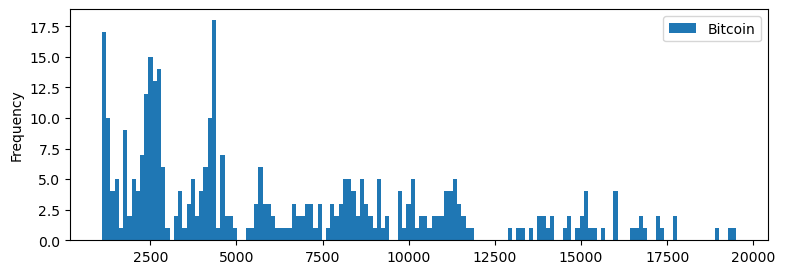

In [111]:
btc_cleaned.plot(kind='hist', y='Bitcoin', bins=150, figsize=(9,3))

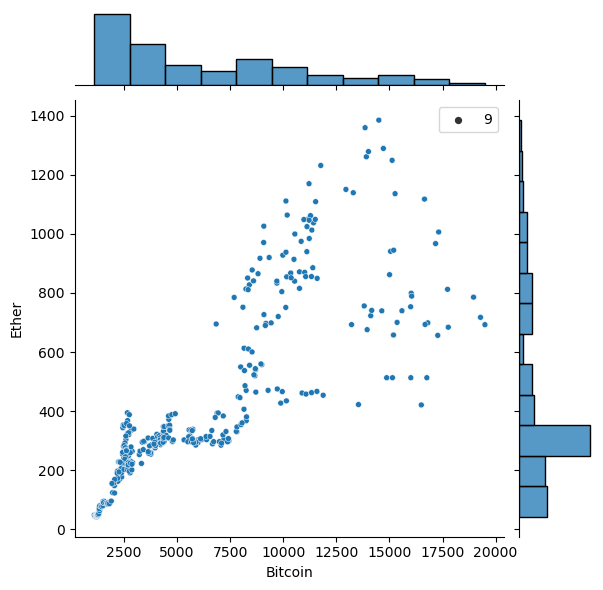

In [115]:
sns.jointplot(x='Bitcoin', y='Ether', data=btc_cleaned, size=9)

In [133]:
btc_cleaned['Bitcoin'].quantile(.25) #2573.7
btc_cleaned['Bitcoin'].quantile(.5) #4580.38
btc_cleaned['Bitcoin'].median() #4580.38

4580.387479999999

<Axes: xlabel='Timestamp'>

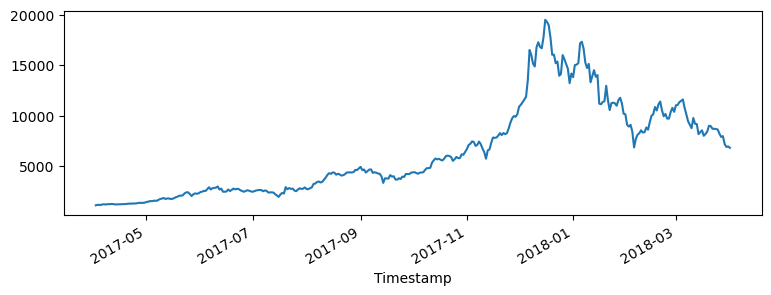

In [153]:
btc_cleaned['Bitcoin'].max() - btc_cleaned['Bitcoin'].min() #18399
btc_cleaned['Bitcoin'].std() #4513.7
btc_cleaned['Bitcoin'].quantile(.75) - btc_cleaned['Bitcoin'].quantile(.25)  #6548.2
btc_cleaned['Bitcoin'].mean() + btc_cleaned['Bitcoin'].std() #10837.2
btc_cleaned['Bitcoin'].plot(figsize=(9,3))

# reasonable range for buying of BTC:  6 548 - 10 837

In [145]:
btc_cleaned['Ether'].quantile(.25) #239.3
btc_cleaned['Ether'].quantile(.5) #309.32
btc_cleaned['Ether'].median() #309.32

309.32

<Axes: xlabel='Timestamp'>

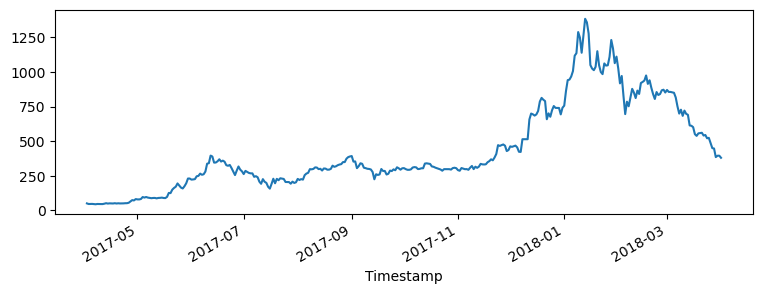

In [154]:
btc_cleaned['Ether'].max() - btc_cleaned['Bitcoin'].min() #285.8
btc_cleaned['Ether'].std() #306.69
btc_cleaned['Ether'].quantile(.75) - btc_cleaned['Ether'].quantile(.25)  #372.5
btc_cleaned['Ether'].mean() + btc_cleaned['Ether'].std() #735
btc_cleaned['Ether'].plot(figsize=(9,3))

# reasonable range for buying of Ether:  372 - 735